Yeast Cells 
Dice Score: self-implemented K means vs sklearn 


##Plot Dice Score / N2DL-HeLa Dataset
#Otsu vs. kmeans vs. Ground Truth

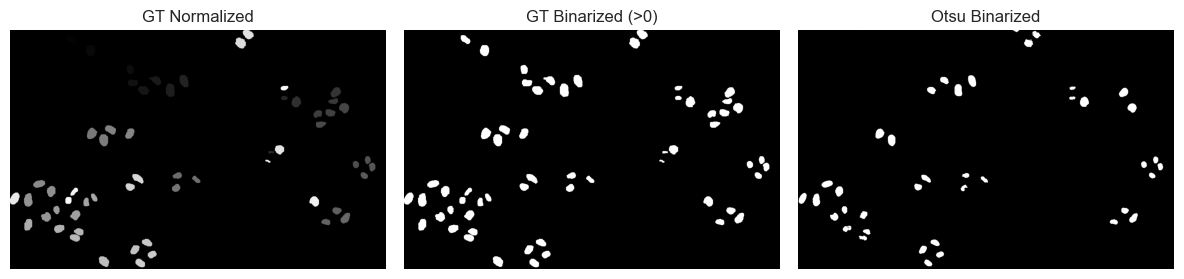

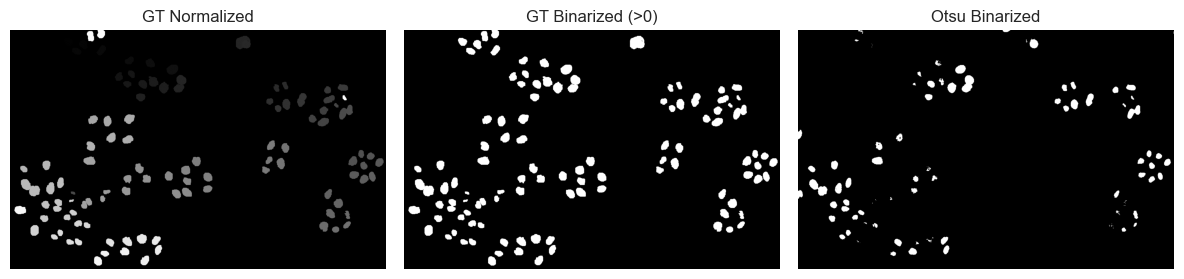

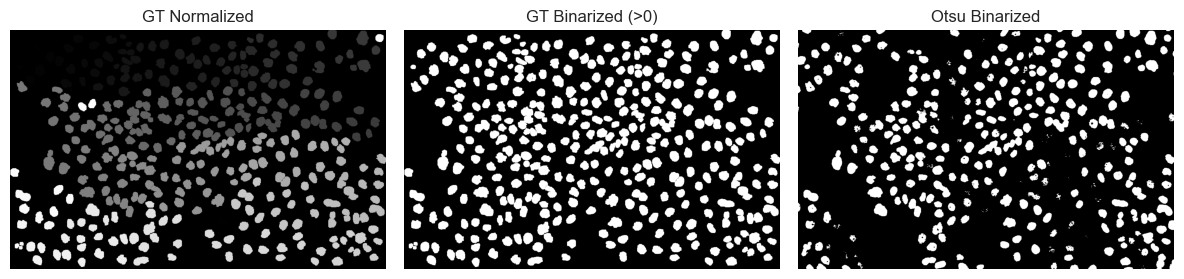

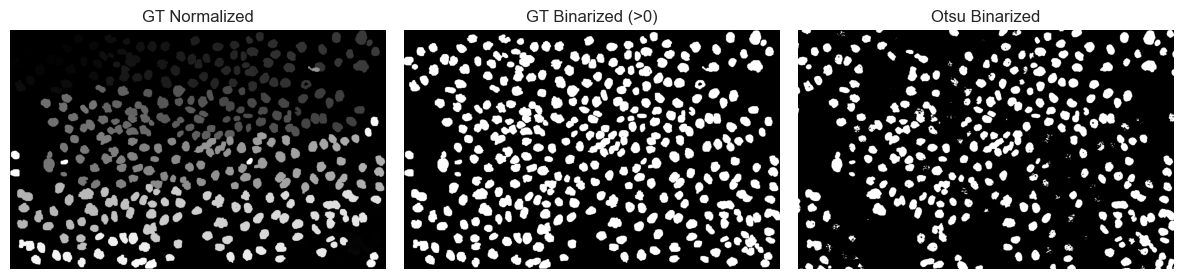

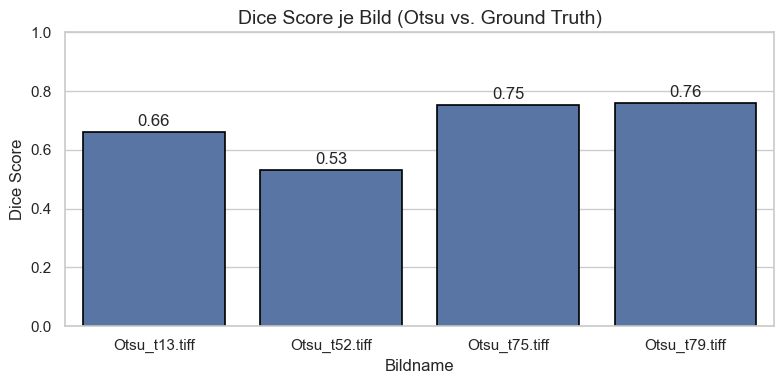

In [18]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Functions.Dice_coefficient import dice_coefficient

base_dir = os.getcwd()
otsu_folder = os.path.join(base_dir, "Images", "Datenvorbereitung_Images", "Otsu")
gt_folder   = os.path.join(base_dir, "Original_Images", "Otsu", "Data", "N2DL-HeLa", "gt")

# Mapping Otsu → Ground Truth
filename_map = {
    "Otsu_t13.tiff": "man_seg13.tif",
    "Otsu_t52.tiff": "man_seg52.tif",
    "Otsu_t75.tiff": "man_seg75.tif",
    "Otsu_t79.tiff": "man_seg79.tif",
}

# Liste für (Bildname, Score)
scores = []

for otsu_name, gt_name in filename_map.items():
    otsu_path = os.path.join(otsu_folder, otsu_name)
    gt_path   = os.path.join(gt_folder, gt_name)

    otsu_img = cv2.imread(otsu_path, cv2.IMREAD_GRAYSCALE)
    gt_img   = cv2.imread(gt_path, cv2.IMREAD_UNCHANGED)
    if otsu_img is None or gt_img is None:
        continue

    # Normalisierung + Binarisierung
    gt_norm  = cv2.normalize(gt_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    gt_bin   = (gt_norm > 0).astype(np.uint8)
    otsu_bin = (otsu_img > 0).astype(np.uint8)

    score = dice_coefficient(gt_bin, otsu_bin)
    scores.append((otsu_name, float(score)))

    # Visualisierung
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("GT Normalized")
    plt.imshow(gt_norm, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("GT Binarized (>0)")
    plt.imshow(gt_bin, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Otsu Binarized")
    plt.imshow(otsu_bin, cmap="gray")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


# DataFrame
df = pd.DataFrame(scores, columns=["Bild", "DiceScore"])

# Barplot Einzelwerte
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df, x="Bild", y="DiceScore", edgecolor="black", linewidth=1.2)

# Gitterlinien horizontal
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Werte auf Balken
for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, h + 0.01, f"{h:.2f}", ha="center", va="bottom")

# Achsen & Titel
ax.set_title("Dice Score je Bild (Otsu vs. Ground Truth)", fontsize=14)
ax.set_xlabel("Bildname")
ax.set_ylabel("Dice Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# **Comparison** - Evaluate with the Dice Score: Is the  the bilateral filter or the gauß filter better? 

                      Bild  DiceScore
0  Otsu_t13_bilateral.tiff   0.640201
1       Otsu_t13_gauß.tiff   0.554465
2            Otsu_t13.tiff   0.662435


/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Functions/Dice_coefficient.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Bild', y='DiceScore', width=0.4, color='skyblue')


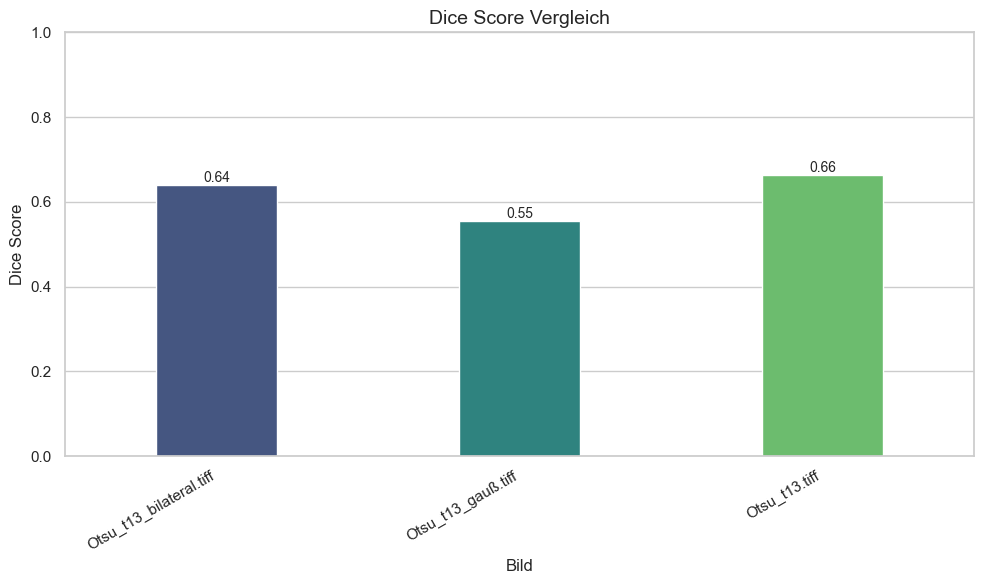

,Bild,DiceScore
0,Otsu_t13_bilateral.tiff,0.640201
1,Otsu_t13_gauß.tiff,0.554465
2,Otsu_t13.tiff,0.662435


In [24]:
from Functions.Dice_coefficient import evaluate_and_plot_dice

image_pairs = [
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_Filtered_t13/Otsu_t13_bilateral.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_Filtered_t13/Otsu_t13_gauß.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_t13.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif')

]

evaluate_and_plot_dice(image_pairs)



# **Dice Score** -  Otsu vs. Ground Truth #

            Bild  DiceScore
0  Otsu_t13.tiff   0.662435
1  Otsu_t52.tiff   0.532181
2  Otsu_t75.tiff   0.752988
3  Otsu_t79.tiff   0.759849


/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Functions/Dice_coefficient.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Bild', y='DiceScore', width=0.4, color='skyblue')


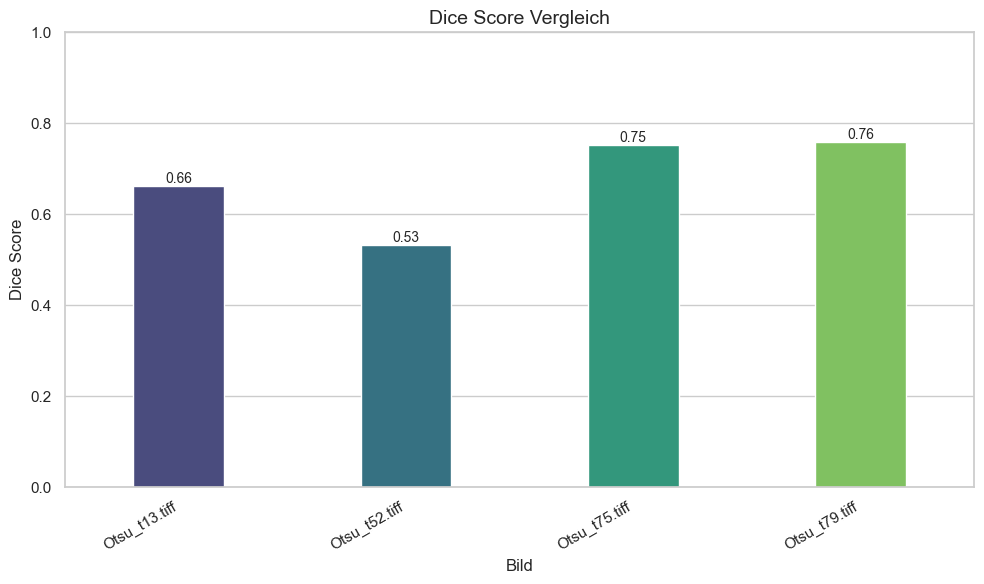

,Bild,DiceScore
0,Otsu_t13.tiff,0.662435
1,Otsu_t52.tiff,0.532181
2,Otsu_t75.tiff,0.752988
3,Otsu_t79.tiff,0.759849


In [19]:
from Functions.Dice_coefficient import evaluate_and_plot_dice

image_pairs = [
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_t13.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
     ('Images/Datenvorbereitung_Images/Otsu/Otsu_t52.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg52.tif'),
     ('Images/Datenvorbereitung_Images/Otsu/Otsu_t75.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg75.tif'),
     ('Images/Datenvorbereitung_Images/Otsu/Otsu_t79.tiff',
     'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg79.tif'),

]

evaluate_and_plot_dice(image_pairs)


            Bild  DiceScore
0  Otsu_t13.tiff   0.662435
1  Otsu_t52.tiff   0.532181
2  Otsu_t75.tiff   0.752988
3  Otsu_t79.tiff   0.759849


/Users/davidlehmann/Documents/GitHub/topic01_team04/Code/Functions/Dice_coefficient.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x='Bild', y='DiceScore', width=0.4, color='skyblue')


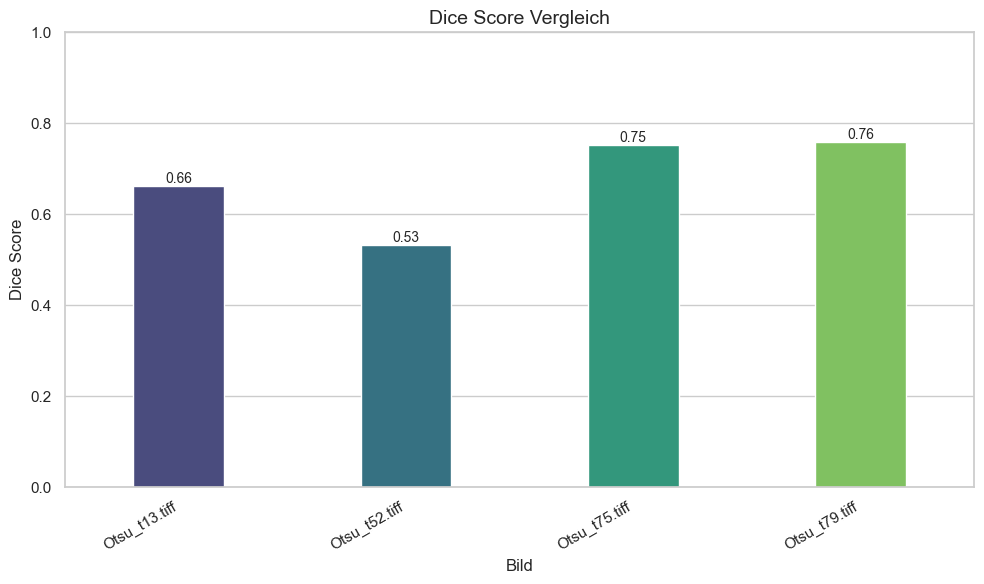

FileNotFoundError: [Errno 2] No such file or directory: 'Images/Datenvorbereitung_Images/KMeans/KMeans_t13.tiff'

In [23]:
from Functions.Dice_coefficient import evaluate_and_plot_dice

otsu_pairs = [
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_t13.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_t52.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg52.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_t75.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg75.tif'),
    ('Images/Datenvorbereitung_Images/Otsu/Otsu_t79.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg79.tif'),
]

kmeans_pairs = [
    ('Images/Datenvorbereitung_Images/KMeans/KMeans_t13.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg13.tif'),
    ('Images/Datenvorbereitung_Images/KMeans/KMeans_t52.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg52.tif'),
    ('Images/Datenvorbereitung_Images/KMeans/KMeans_t75.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg75.tif'),
    ('Images/Datenvorbereitung_Images/KMeans/KMeans_t79.tiff', 'Original_Images/Otsu/Data/N2DL-HeLa/gt/man_seg79.tif'),
]

df_otsu = evaluate_and_plot_dice(otsu_pairs)
df_kmeans = evaluate_and_plot_dice(kmeans_pairs)

combined_df = pd.concat([df_otsu, df_kmeans], ignore_index=True)
print(combined_df)